               Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count   3810.000000  3810.000000        3810.000000        3810.000000   
mean   12667.727559   454.239180         188.776222          86.313750   
std     1732.367706    35.597081          17.448679           5.729817   
min     7551.000000   359.100006         145.264465          59.532406   
25%    11370.500000   426.144752         174.353855          82.731695   
50%    12421.500000   448.852493         185.810059          86.434647   
75%    13950.000000   483.683746         203.550438          90.143677   
max    18913.000000   548.445984         239.010498         107.542450   

       Eccentricity   Convex_Area       Extent  
count   3810.000000   3810.000000  3810.000000  
mean       0.886871  12952.496850     0.661934  
std        0.020818   1776.972042     0.077239  
min        0.777233   7723.000000     0.497413  
25%        0.872402  11626.250000     0.598862  
50%        0.889050  12706.500000     0

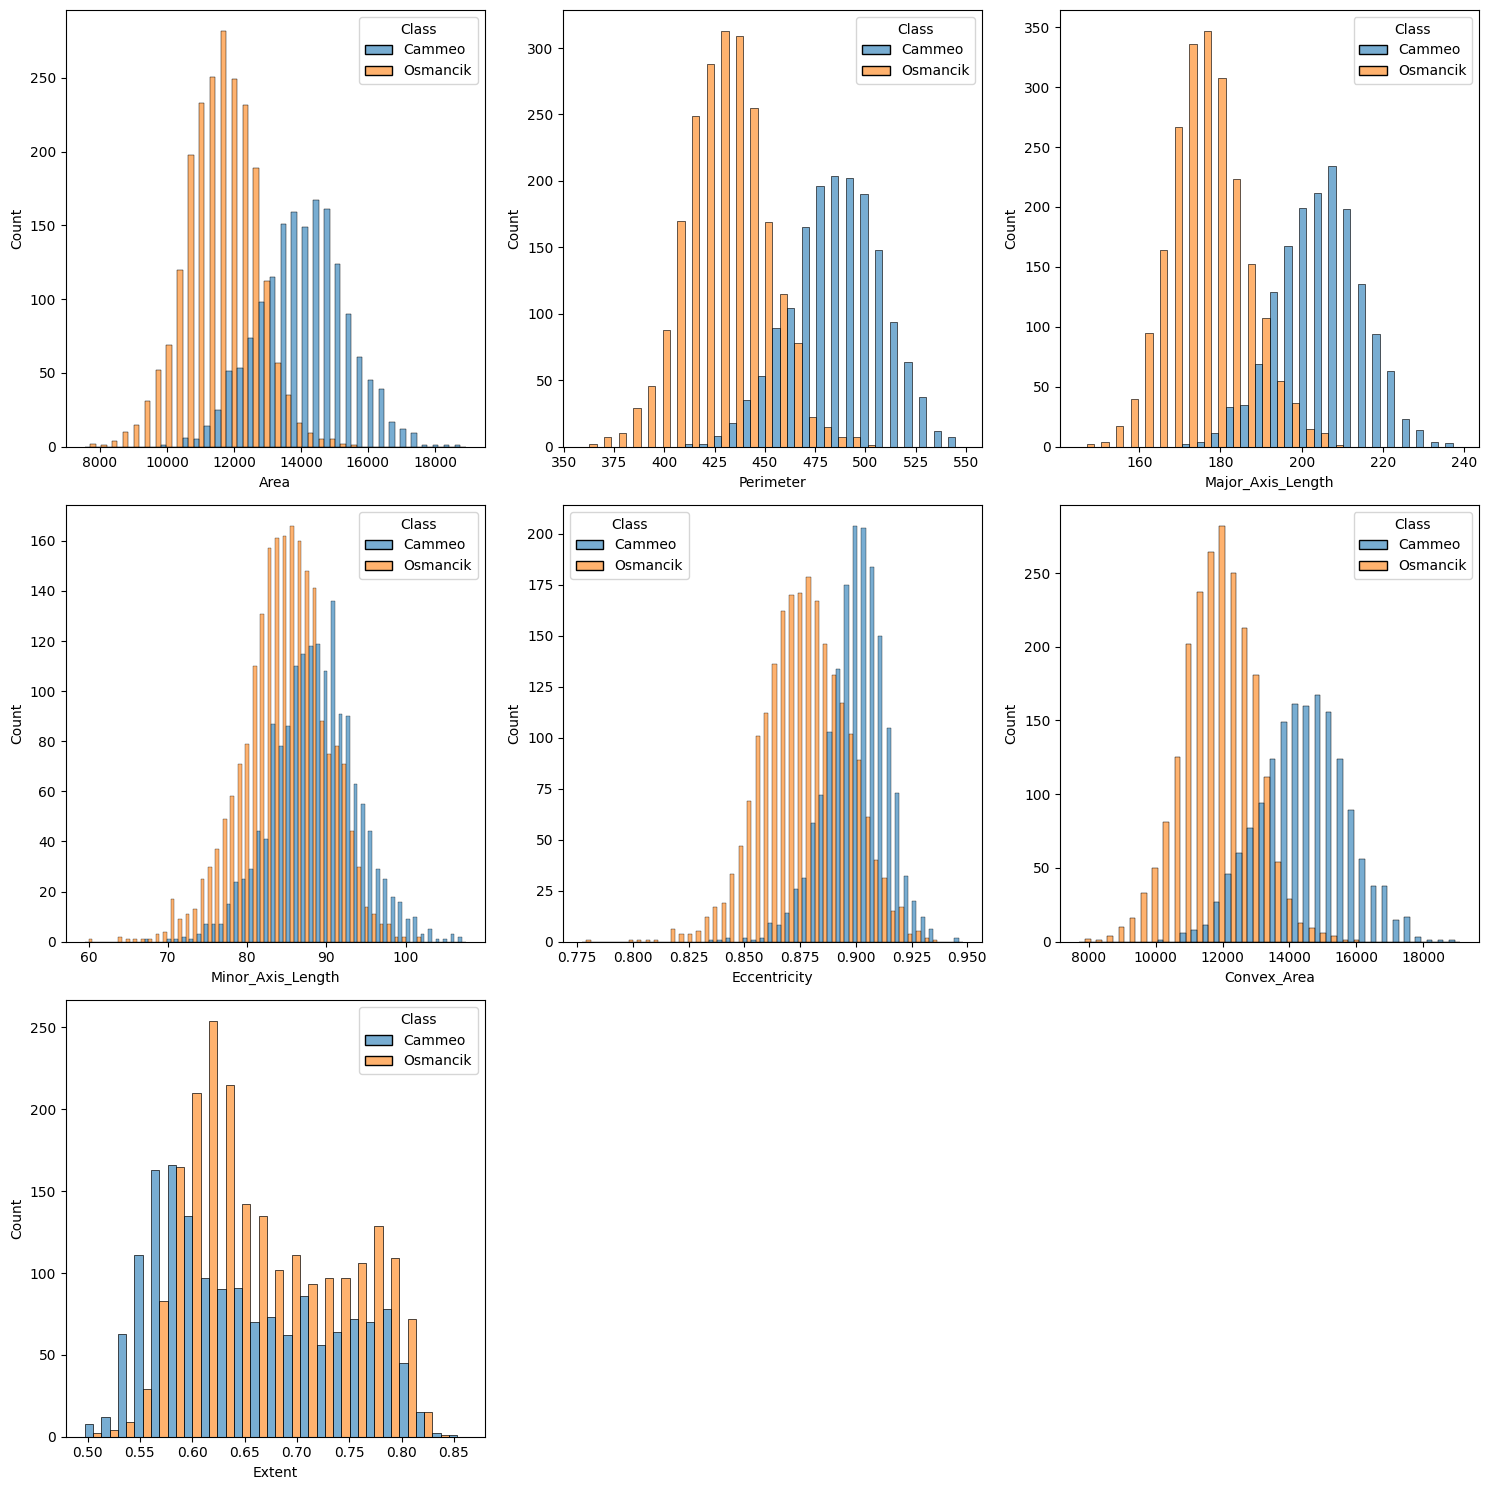

                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.966453           0.903015           0.787840   
Perimeter          0.966453   1.000000           0.971884           0.629828   
Major_Axis_Length  0.903015   0.971884           1.000000           0.452092   
Minor_Axis_Length  0.787840   0.629828           0.452092           1.000000   
Eccentricity       0.352095   0.544601           0.710897          -0.291683   
Convex_Area        0.998939   0.969937           0.903381           0.787318   
Extent            -0.061184  -0.130923          -0.139562           0.063366   

                   Eccentricity  Convex_Area    Extent  
Area                   0.352095     0.998939 -0.061184  
Perimeter              0.544601     0.969937 -0.130923  
Major_Axis_Length      0.710897     0.903381 -0.139562  
Minor_Axis_Length     -0.291683     0.787318  0.063366  
Eccentricity           1.000000     0.352716 -0.198580  
Convex_Area      

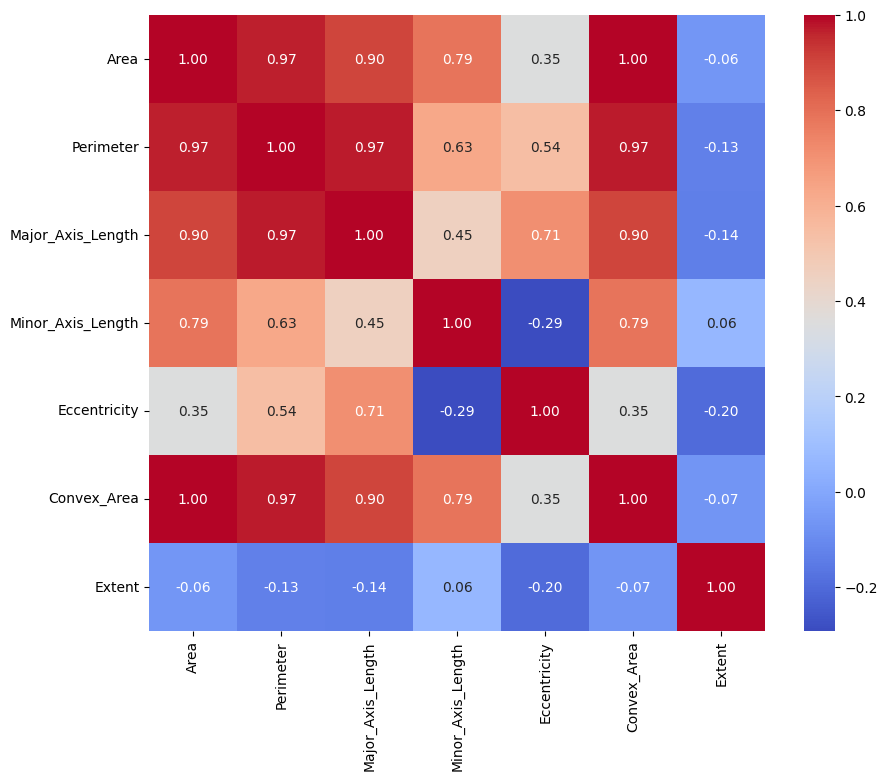

Klassenhäufigkeit: Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


C:\Users\alexi\AppData\Local\Temp\ipykernel_21340\245490323.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Class'].index, y=df['Class'].values, palette="viridis")


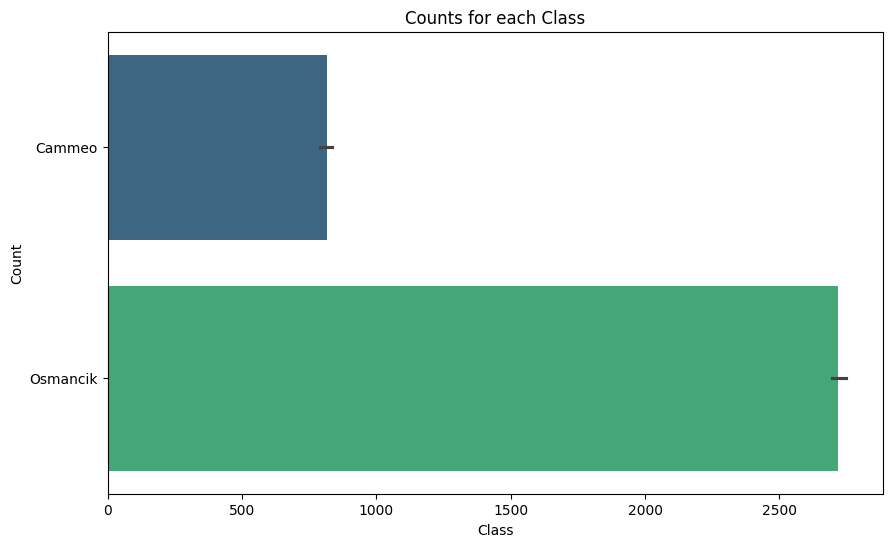

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Add this line
import math
  
# fetch dataset 
df = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets

df= pd.concat([X, y], axis=1)
print(df.describe()) # Display the summary statistics of the dataset

# Display the information of the DataFrame
print(df.info())

# Assuming 'Class' is your categorical column
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(num_cols) / 3)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

# Flatten the axes array
axs = axs.ravel()

for i, column in enumerate(num_cols):
    # Add an alpha of 0.6 and remove the space between the bars
    sns.histplot(data=df, x=column, hue='Class', multiple='dodge', ax=axs[i], alpha=0.6, shrink=1)

# Remove the unused subplots
for j in range(i+1, num_rows*3):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Select columns from 'Area' to 'Extent' and calculate the correlation matrix
corr_matrix = df.loc[:, 'Area':'Extent'].corr()

# Print the correlation matrix
print(corr_matrix)

# Create a correlation plot
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Show the plot
plt.show()

# Print the counts for the 'Class' column
print("Klassenhäufigkeit:", df['Class'].value_counts())

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Class'].index, y=df['Class'].values, palette="viridis")

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts for each Class')

# Show the plot
plt.show()

[[319  31]
 [ 26 386]]


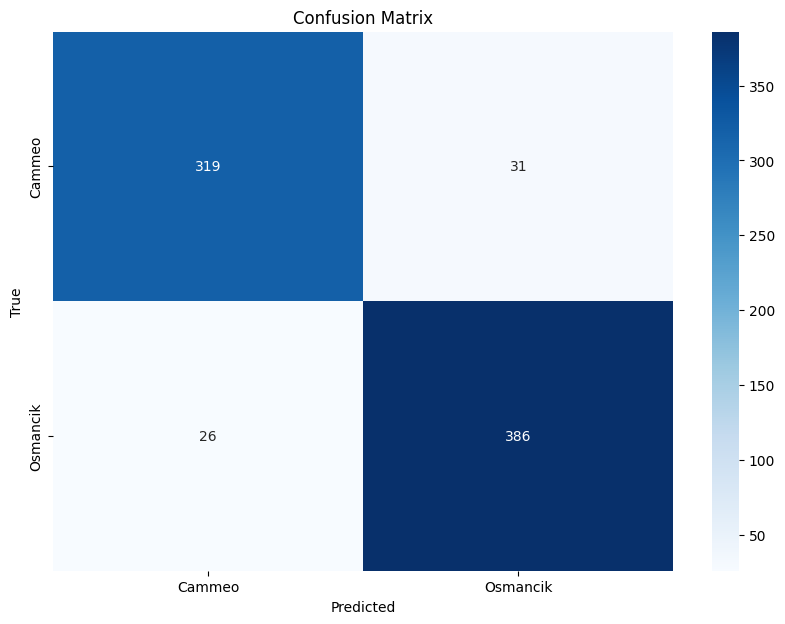

classification_report:               precision    recall  f1-score   support

      Cammeo       0.92      0.91      0.92       350
    Osmancik       0.93      0.94      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.92      0.92       762
weighted avg       0.93      0.93      0.93       762

Accuracy: 0.9251968503937008


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

# Split the data into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Cammeo', 'Osmancik'])
print(cm)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add label names
class_names = ['Cammeo', 'Osmancik']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

# Show the plot
plt.show()

# Print the classification report
print("classification_report:", classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))